## Set-up

In [157]:
# Import required modules
# For NewsAPI
import requests
import numpy as np

import pandas as pd
import csv

# For Individual Feature Extraction 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from collections import Counter

# For Relational Feature Extraction
from statistics import mean
import math

# For feature analyzation
#enable multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# For machine learning
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Evaluation
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Cross-validation
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#feature selection
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.feature_selection import chi2

# Saving
import joblib
from joblib import dump, load

## Read in feature values generated from ActualNews

In [158]:
csv_ActualNews = pd.read_csv('ActualNewsFeatureData.csv',  encoding = 'utf-8-sig')
feature_headings = [col for col in csv_ActualNews.columns if col not in ['Unnamed: 0', 'Text', 'Reference']]
chosen_features = csv_ActualNews[feature_headings]

X = chosen_features[feature_headings].drop(chosen_features.columns[0], axis=1).abs()
y = chosen_features["Label"]

chosen_features.head(n=3)
X.head(n=3)
y.head(n=3)

,Label,# of Characters,# of Words,# of Verbs,# of Noun,# of Sentence,Average # of Words per Sentence,Average # of Characters per Words,# of Question Marks,% of Subjective Verbs,...,% of generalizing terms- avg sub,% of # and quantifiers- avg sub,1st person pronouns- avg sub,2nd and 3rd person pronouns- avg sub,Exclusive term- avg sub,# of exclamation marks- avg sub,Lexical- avg sub,Singular pronouns(1st person)- avg sub,Group ref pronouns(1st person)- avg sub,2nd 3rd pronouns- avg sub
0,0.0,222,39,3,30,1,39.0,5.692308,0,0.0,...,-0.05,0.59,-0.01,-0.74,0.0,0.0,3.93,0.0,-0.05,-0.74
1,0.0,221,40,6,21,1,40.0,5.525000,0,0.0,...,-0.05,0.09,-0.01,-0.77,0.0,0.0,4.44,0.0,-0.05,-0.77
2,0.0,127,25,0,15,3,13.0,5.080000,0,0.0,...,-0.05,-0.07,-0.01,-0.43,0.0,0.0,1.62,0.0,-0.05,-0.43


,# of Characters,# of Words,# of Verbs,# of Noun,# of Sentence,Average # of Words per Sentence,Average # of Characters per Words,# of Question Marks,% of Subjective Verbs,% of Passive Voice,...,% of generalizing terms- avg sub,% of # and quantifiers- avg sub,1st person pronouns- avg sub,2nd and 3rd person pronouns- avg sub,Exclusive term- avg sub,# of exclamation marks- avg sub,Lexical- avg sub,Singular pronouns(1st person)- avg sub,Group ref pronouns(1st person)- avg sub,2nd 3rd pronouns- avg sub
0,222.0,39.0,3.0,30.0,1.0,39.0,5.692308,0.0,0.0,0.0,...,0.05,0.59,0.01,0.74,0.0,0.0,3.93,0.0,0.05,0.74
1,221.0,40.0,6.0,21.0,1.0,40.0,5.525000,0.0,0.0,0.0,...,0.05,0.09,0.01,0.77,0.0,0.0,4.44,0.0,0.05,0.77
2,127.0,25.0,0.0,15.0,3.0,13.0,5.080000,0.0,0.0,0.0,...,0.05,0.07,0.01,0.43,0.0,0.0,1.62,0.0,0.05,0.43


0    0.0
1    0.0
2    0.0
Name: Label, dtype: float64

## Feature ranking using SelectKBest

In [159]:
#chi2
n = 20
bestfeatures = SelectKBest(score_func=chi2, k=n)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(n,'Score'))

                                    Features       Score
50                  # of Characters- avg sub  941.803182
53                        # of Noun- avg sub  573.763290
58            % of Subjective Verbs- avg sub  354.978352
25                      # of Characters- sub  287.341335
28                            # of Noun- sub  200.879204
51                       # of Words- avg sub  194.379156
62          # of Unique Wrods/Terms- avg sub  156.898376
71                          Lexical- avg sub  156.898376
3                                  # of Noun  152.449610
30      Average # of Words per Sentence- sub  134.977315
54                    # of Sentence- avg sub   92.985414
8                      % of Subjective Verbs   88.520607
55  Average # of Words per Sentence- avg sub   69.501687
26                           # of Words- sub   64.087035
37              # of Unique Wrods/Terms- sub   60.037865
46                              Lexical- sub   60.037865
29                        # of 

SelectKBest(k=20, score_func=<function chi2 at 0x000002B1E8A03048>)

<Figure size 1080x360 with 0 Axes>

<BarContainer object of 75 artists>

([<matplotlib.axis.XTick at 0x2b1eeb39088>,
 <a list of 75 Text xticklabel objects>)

[]

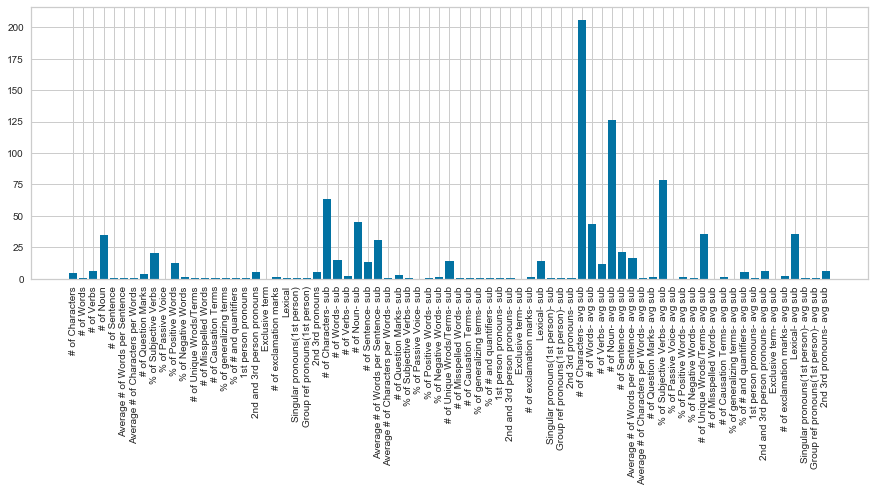

In [160]:
# Perform feature selection
selector = SelectKBest(chi2, k=n)
selector.fit(X, y)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

plt.figure(figsize=(15,5))
plt.bar(range(len(X.columns)), scores)
plt.xticks(range(len(X.columns)), X.columns, rotation='vertical')
plt.plot()

In [161]:
#anova
n = 20
bestfeatures = SelectKBest(score_func=f_classif, k=n)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(n,'Score'))

                                    Features       Score
62          # of Unique Wrods/Terms- avg sub  776.960847
71                          Lexical- avg sub  776.960847
53                        # of Noun- avg sub  762.921555
66           % of # and quantifiers- avg sub  626.922680
57              # of Question Marks- avg sub  559.778182
68      2nd and 3rd person pronouns- avg sub  501.438810
74                 2nd 3rd pronouns- avg sub  501.438810
52                       # of Verbs- avg sub  481.361704
58            % of Subjective Verbs- avg sub  463.975826
50                  # of Characters- avg sub  296.383872
51                       # of Words- avg sub  293.800789
70           # of exclamation marks- avg sub  275.475984
54                    # of Sentence- avg sub  140.557147
64             # of Causation Terms- avg sub  111.274682
73   Group ref pronouns(1st person)- avg sub   78.252010
28                            # of Noun- sub   59.621809
3                              

SelectKBest(k=20, score_func=<function f_classif at 0x000002B1E89FCAF8>)

<Figure size 1080x360 with 0 Axes>

<BarContainer object of 75 artists>

([<matplotlib.axis.XTick at 0x2b1ec546a48>,
 <a list of 75 Text xticklabel objects>)

[]

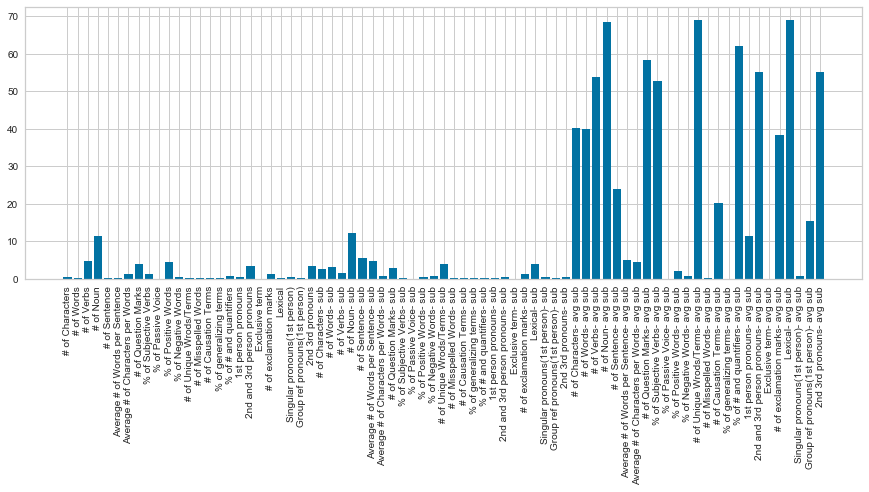

In [162]:
# Perform feature selection
selector = SelectKBest(f_classif, k=n)
selector.fit(X, y)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

plt.figure(figsize=(15,5))
plt.bar(range(len(X.columns)), scores)
plt.xticks(range(len(X.columns)), X.columns, rotation='vertical')
plt.plot()

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.LinearSVC()

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

coef = anova_svm[:-1].inverse_transform(anova_svm['linearsvc'].coef_)
print(coef)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=3,
                             score_func=<function f_regression at 0x000002B1E8A03318>)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        26
         1.0       0.92      1.00      0.96        23

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.0675061
   0.          0.          0.          0.          0.          0.
   0. 